In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import ascii
from scipy.optimize import curve_fit

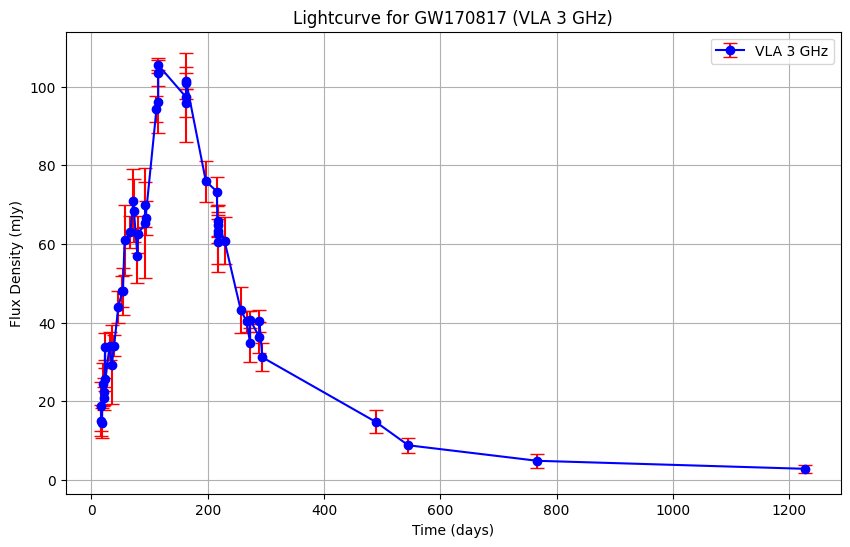

In [76]:
# Load the data from the txt file
file_path = 'Data/gw170817_afterglow_data_full.txt'
data = ascii.read(file_path)

# Convert Data to Pandas DataFrame
data = data.to_pandas()

# Extract the data if telescope is VLA
vla_data = data[data['Telescope'] == 'VLA']

# Extract the data if the FluxD has '<' in it
vla_data = vla_data[vla_data['FluxD'].str.contains('<') == False]

vla_data['FluxD'] = pd.to_numeric(vla_data['FluxD'])
vla_data['FluxDErr'] = pd.to_numeric(vla_data['FluxDErr'])
vla_data['Freq'] = pd.to_numeric(vla_data['Freq'])

# Convert all data to Frequency 3.0 GHz using the formuala FluxD proportional to (Frequency)^(-0.584)
vla_data['FluxD'] = vla_data['FluxD'] * (vla_data['Freq'] / 3.000000e+09)**0.584
vla_data['Freq'] = 3.000000e+09
# print(vla_data)

# Plotting the lightcurve with error bars
plt.figure(figsize=(10, 6))
plt.errorbar(vla_data['T'], vla_data['FluxD'], yerr=vla_data['FluxDErr'], fmt='o', linestyle='-', color='b', ecolor='r', capsize=5, label='VLA 3 GHz')

# Adding labels and title
plt.xlabel('Time (days)')
plt.ylabel('Flux Density (mJy)')
plt.title('Lightcurve for GW170817 (VLA 3 GHz)')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()
